Read in protein (PN) data

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.polynomial.polynomial as poly
import pandas as pd

# Read in data from Excel
df = pd.read_excel(r'C:\Users\schmi\Documents\BCA\results\2025_combo\BCA_output_micro_tube.xlsx')

output_fname = r'C:\Users\schmi\Documents\PNPS\results\PNPS_C.xlsx'
output_sheet_lb = f'C_lb'
output_sheet_tb = f'C_tb'

# Show the first few rows of the data
print(df.head())

# loosely-bound (lb) and tightly-bound (tb) data
BCA_lb_tmp  = df.iloc[1:4, 1:].values  # indexing excludes the last index
BCA_tb_tmp  = df.iloc[6:9, 1:].values  
## convert to numeric
BCA_lb0   = np.vectorize(lambda x: pd.to_numeric(x, errors='coerce'))(BCA_lb_tmp)  # 2D array
BCA_tb0   = np.vectorize(lambda x: pd.to_numeric(x, errors='coerce'))(BCA_tb_tmp) 

# size_name = ['40', '20', '14', '10', '7', '5']
size_name = ['0 - 0.85', '0.85 - 1.4', '1.4 - 2', '2 - 2.8', '2.8 - 4', '>4']

  Units: ug protein/mL buffer  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0                          LB   40.000000   20.000000   14.000000   10.000000   
1                           A   30.954689   34.277285   22.986160   19.805807   
2                           B   24.009244   23.872699   13.058244   10.105699   
3                           C   25.034198   29.739292   18.470571   18.869705   
4                         NaN         NaN         NaN         NaN         NaN   

   Unnamed: 5  Unnamed: 6  
0    7.000000    5.000000  
1   18.669975   18.736516  
2    6.404079    7.517184  
3   17.742363    8.956340  
4         NaN         NaN  


Read in palysaccharide (PS) data

In [3]:
# Read in data from Excel
df2 = pd.read_excel(r'C:\Users\schmi\Documents\PS\Feb_2025\results\PS_output.xlsx')

# Show the first few rows of the data
print(df2.head())

# loosely-bound (lb) and tightly-bound (tb) data
PS_lb_tmp  = df2.iloc[1:4, 1:].values  # indexing excludes the last index
PS_tb_tmp  = df2.iloc[6:9, 1:].values  
## convert to numeric
PS_lb0   = np.vectorize(lambda x: pd.to_numeric(x, errors='coerce'))(PS_lb_tmp)  # 2D array
PS_tb0   = np.vectorize(lambda x: pd.to_numeric(x, errors='coerce'))(PS_tb_tmp) 

  Units: ug sugar/mL buffer  Unnamed: 1  Unnamed: 2  Unnamed: 3  Unnamed: 4  \
0                        LB   40.000000   20.000000   14.000000   10.000000   
1                         A   12.182325    9.310070    5.298816    5.893076   
2                         B    7.081595    6.388292    4.902643    3.912210   
3                         C   11.216469    7.184743    6.512789    5.995901   
4                       NaN         NaN         NaN         NaN         NaN   

   Unnamed: 5  Unnamed: 6  
0    7.000000    5.000000  
1    7.477769    4.060775  
2    4.110297    3.466515  
3    6.874610    2.532751  
4         NaN         NaN  


In [8]:
# verify data contents
print(BCA_tb0)
print(PS_tb0)

[[169.65782074 158.08888237 163.26231543 181.74414301 208.63223745
  161.75822008]
 [136.58073026 107.69015709  94.08039728  94.08039728 102.71295712
  161.68264778]
 [128.40199367 105.29164473 101.60902274  42.9658823  105.47600128
  111.38894917]]
[[53.87955166 43.48000585 45.85704489 51.50251262 61.0106688  42.48957291]
 [45.33107706 34.26967399 31.53016762 31.27172363 35.30344998 28.84235006]
 [43.93547947 33.6494084  25.2758229  10.28607108 26.92986448 27.49844127]]


In [5]:
# Read in VSS (mg VSS to 25 mg TSS)
VSS_tmp = df.iloc[10, 1:].values   
VSS_0  = pd.to_numeric(VSS_tmp, errors='coerce')
print(VSS_0)

[22.36842105 22.19827586 22.51712329 21.54150198 20.46460177 20.9375    ]


In [9]:
# define VSS factor: 10 mL buffer / mg VSS in sample
VSS_factor = np.round(10 / VSS_0, 3)  
print(VSS_factor)

# determine concentration of unknown samples [ug protein/mg VSS] simplifies to [mg protein/gVSS]
BCA_lb = VSS_factor * BCA_lb0  # [mg/g VSS] 
BCA_tb = VSS_factor * BCA_tb0  # [mg/g VSS]
print('concentration[mg/gVSS]: ', BCA_lb)

PS_lb = VSS_factor * PS_lb0  # [mg/g VSS] 
PS_tb = VSS_factor * PS_tb0  # [mg/g VSS]
print('concentration[mg/gVSS]: ', PS_lb)

[0.447 0.45  0.444 0.464 0.489 0.478]
concentration[mg/gVSS]:  [[13.83674597 15.42477836 10.20585522  9.18989454  9.12961775  8.95605461]
 [10.73213224 10.74271463  5.79786031  4.68904456  3.13159484  3.59321389]
 [11.19028638 13.38268133  8.20093336  8.75554316  8.6760156   4.28113032]]
concentration[mg/gVSS]:  [[5.44549932 4.18953131 2.35267439 2.73438725 3.65662887 1.94105047]
 [3.16547318 2.87473159 2.1767735  1.81526548 2.00993508 1.6569943 ]
 [5.01376185 3.2331344  2.89167819 2.78209794 3.36168445 1.21065506]]


Calculate ratio PN/PS [mg protien/mg sugar]

In [15]:
C_lb = BCA_lb/PS_lb
C_tb = BCA_tb/PS_tb

print(C_lb)
print(C_tb)

# Convert 2D arrays to DataFrame and save to Excel
df_C_lb = np.transpose(pd.DataFrame(C_lb))
df_C_tb = np.transpose(pd.DataFrame(C_tb))

# Save to Excel file
with pd.ExcelWriter(output_fname) as writer:
    df_C_lb.to_excel(writer, sheet_name = output_sheet_lb)  
    df_C_tb.to_excel(writer, sheet_name = output_sheet_tb)

[[2.54095082 3.68174318 4.33798032 3.36086066 2.49673075 4.61402461]
 [3.39037219 3.73694527 2.66351106 2.58311779 1.55805771 2.16851313]
 [2.23191422 4.13922827 2.83604634 3.14710099 2.58085366 3.53620983]]
[[3.14883505 3.63589837 3.56024501 3.52884032 3.41960253 3.80700979]
 [3.01296018 3.14243308 2.98382167 3.00848135 2.90943115 5.60573766]
 [2.92251263 3.12907863 4.02000849 4.17709366 3.91669261 4.05073684]]


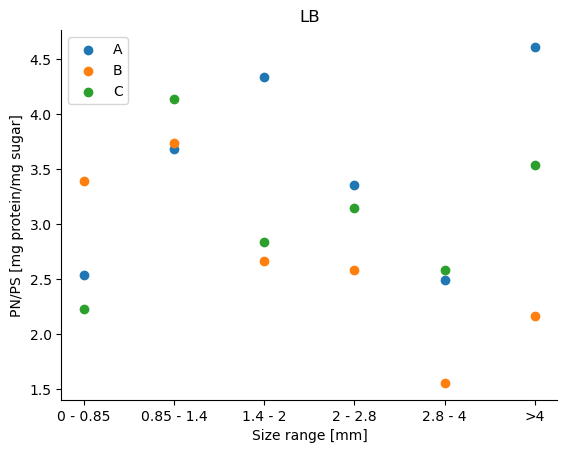

In [7]:
plt.scatter(size_name, C_lb[0,:], label = 'A')
plt.scatter(size_name, C_lb[1,:], label = 'B')
plt.scatter(size_name, C_lb[2,:], label = 'C')

# axes labels
plt.title("LB")
plt.xlabel("Size range [mm]")
plt.ylabel("PN/PS [mg protein/mg sugar]")
plt.legend() 

# remove outer borderI
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('PNPS_LB.png')

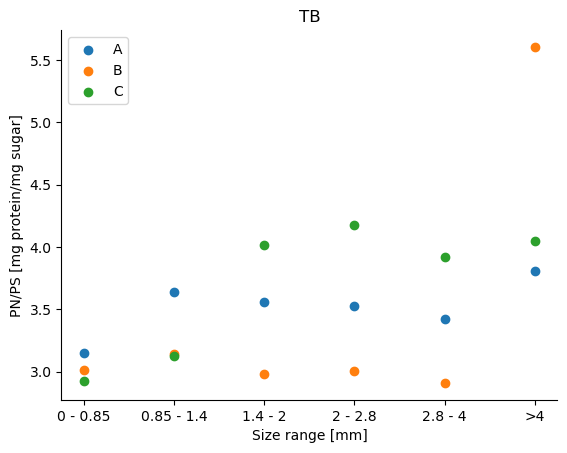

In [8]:
plt.scatter(size_name, C_tb[0,:], label = 'A')
plt.scatter(size_name, C_tb[1,:], label = 'B')
plt.scatter(size_name, C_tb[2,:], label = 'C')

# axes labels
plt.title("TB")
plt.xlabel("Size range [mm]")
plt.ylabel("PN/PS [mg protein/mg sugar]")
plt.legend() 

# remove outer borderI
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('PNPS_TB.png')

[ 6.42261158  6.06191864  4.81244795  1.75945263 10.20353931  1.72237052]
